<a href="https://colab.research.google.com/github/space-owner/Tensorflow-2/blob/main/Basic_Text_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## ***Basic Text Classification***
- 해당 게시물은 **```Tensorflow-2```** 학습을 위해 **```Tutorial```**을 바탕으로 작성되었어요.
- 자세한 내용은 해당 **```Link```**를 통해 확인하실 수 있어요. [바로가기](https://www.tensorflow.org/)

- 우리는 먼저 필요한 **```Library```**를 불러올거에요.
    - **```os```** : 파이썬 코드로 쉽게 디렉토리에 접근할 수 있어요.
    - **```re```** : 정규 표현식을 사용할 수 있어요.
    - **```string```** : 개흐른 개발자를 위한 패키지 인가봐요.
    - **```matplotlib.pyplot```** : 모델이 잘 만들어졌는지 확인할 수 있도록 시각화 할거에요.
    - **```tensorflow```** : 데이터 로드와 간단한 전처리에 필요해요.
    - **```keras```** : 모델 네트워크를 구성할거에요.

In [ ]:
import os
import re
import shutil
import string
import matplotlib.pyplot as plt
import tensorflow as tf

from tensorflow.keras import layers, losses, preprocessing
from tensorflow.keras.layers.experimental.preprocessing import TextVectorization

print("tesorflow version:", tf.__version__)

tesorflow version: 2.6.0


- **```get_file```**을 통해 데이터를 다운로드 해요.
- **```listdir```**를 통해 **```aclImdb```** 디렉토리에 파일 목록을 확인할 수 있어요.

In [ ]:
url = "https://ai.stanford.edu/~amaas/data/sentiment/aclImdb_v1.tar.gz"

dataset = tf.keras.utils.get_file(
    "aclImdb_v1", url, untar=True, cache_dir='.', cache_subdir=''
)

dataset_dir = os.path.join(
    os.path.dirname(dataset), 'aclImdb'
)
print("directory: {} in {}".format(
    os.listdir(dataset_dir), dataset_dir)
)

directory: ['imdb.vocab', 'imdbEr.txt', 'README', 'train', 'test'] in ./aclImdb


- **```acllmdb/train/pos```** 내에 존재하는 **```1181_9.txt```** 데이터를 읽어볼게요. 
- 텍스트 파일에는 문장이 있는 것을 알 수 있어요.
    - **```Rachel Griffiths writes and directs this award winning short film...```** 
- 우리는 위 문장을 보고 **```긍정(pos, 1)```** 또는 **```부정(neg, 0)```**을 분류할 거에요.
- 이는 지도 학습을 의미하고 **```acllmdb/train/unsup```**의 비지도 학습셋은 과감하게 지울거에요.
- **```rm-rf```** 가 생각나네요. 쓱 :(

In [ ]:
train_dir = os.path.join(dataset_dir, 'train')

sample_file = os.path.join(train_dir, 'pos/1181_9.txt')

with open(sample_file) as f:
    print(f.read())

remove_dir = os.path.join(train_dir, 'unsup')

shutil.rmtree(remove_dir)

Rachel Griffiths writes and directs this award winning short film. A heartwarming story about coping with grief and cherishing the memory of those we've loved and lost. Although, only 15 minutes long, Griffiths manages to capture so much emotion and truth onto film in the short space of time. Bud Tingwell gives a touching performance as Will, a widower struggling to cope with his wife's death. Will is confronted by the harsh reality of loneliness and helplessness as he proceeds to take care of Ruth's pet cow, Tulip. The film displays the grief and responsibility one feels for those they have loved and lost. Good cinematography, great direction, and superbly acted. It will bring tears to all those who have lost a loved one, and survived.


- **```text_dataset_from_directory```**로  **```acllmdb/train```** 아래 텍스트 데이터를 불러올거에요.
    - **```batch_size```**는 한번에 처리하고자 하는 데이터를 의미해요.
    - 눈치 빠르신 분들은 금방 아시겠지만 메모리를 효율적으로 사용하기 위함이라 해요.
    - **```validation_split```**을 통해서 검증 데이터셋의 비율을 나눴구요.
    - 우리는 **```80%```**를 **```training```**으로 사용할거에요.
    - 마지막으로 **```seed```**를 통해 데이터셋이 바뀌지 않도록 핀을 고정 시켜야 해요.
    - 매번 다른 데이터를 사용한다면 모델 성능 평가를 할 수 없기 때문이죠 :(

In [ ]:
batch_size = 32
seed = 42

train_dataset = tf.keras.preprocessing.text_dataset_from_directory(
    'aclImdb/train', 
    batch_size=batch_size,
    validation_split=0.2, 
    subset='training', 
    seed=seed
)

for text_batch, label_batch in train_dataset.take(1):
    for i in range(3):
        print("text: {} \nlabel: {}".format(
            text_batch.numpy()[i], label_batch.numpy()[i])
        )

print("class size:{} \nlabel 0: {} \nlabel 1: {}".format(
    len(train_dataset.class_names), train_dataset.class_names[0], train_dataset.class_names[1])
)

Found 25000 files belonging to 2 classes.
Using 20000 files for training.
text: b'"Pandemonium" is a horror movie spoof that comes off more stupid than funny. Believe me when I tell you, I love comedies. Especially comedy spoofs. "Airplane", "The Naked Gun" trilogy, "Blazing Saddles", "High Anxiety", and "Spaceballs" are some of my favorite comedies that spoof a particular genre. "Pandemonium" is not up there with those films. Most of the scenes in this movie had me sitting there in stunned silence because the movie wasn\'t all that funny. There are a few laughs in the film, but when you watch a comedy, you expect to laugh a lot more than a few times and that\'s all this film has going for it. Geez, "Scream" had more laughs than this film and that was more of a horror film. How bizarre is that?<br /><br />*1/2 (out of four)' 
label: 0
text: b"David Mamet is a very interesting and a very un-equal director. His first movie 'House of Games' was the one I liked best, and it set a series of

In [ ]:
val_dataset = tf.keras.preprocessing.text_dataset_from_directory(
    directory='aclImdb/test',
    batch_size=32,
    validation_split=0.2,
    subset='validation',
    seed=seed
)

Found 25000 files belonging to 2 classes.
Using 5000 files for validation.


In [ ]:
test_dataset = tf.keras.preprocessing.text_dataset_from_directory(
    directory='aclImdb/test',
    batch_size=batch_size
)

Found 25000 files belonging to 2 classes.


In [ ]:
def custom_standardization(input_data):
    lowercase = tf.strings.lower(input_data)
    stripped_html = tf.strings.regex_replace(
        lowercase, '<br />', ' '
    )
    return tf.strings.regex_replace(
        stripped_html, '[%s]' % re.escape(string.punctuation), ''
    )

In [ ]:
max_features = 10000
sequence_length = 250

vectorize_layer = TextVectorization(
    standardize=custom_standardization,
    max_tokens=max_features,
    output_mode='int',
    output_sequence_length=sequence_length
)

In [ ]:
train_text = train_dataset.map(lambda x, y: x)

vectorize_layer.adapt(train_text)

In [ ]:
def vectorize_text(text, label):
    text = tf.expand_dims(text, -1)
    return vectorize_layer(text), label

text_batch, label_batch = next(iter(train_dataset))

first_review, first_label = text_batch[0], label_batch[0]

first_review_vector, _ = vectorize_text(first_review, first_label)

print("first review: {} \nfirst label: {} \nreview to vector: {}".format(
    first_review.numpy(), first_label, first_review_vector)
)
print(
    vectorize_layer.get_vocabulary()[33],
    vectorize_layer.get_vocabulary()[2977],
    vectorize_layer.get_vocabulary()[3311]
)

first review: b'Great movie - especially the music - Etta James - "At Last". This speaks volumes when you have finally found that special someone.' 
first label: 0 
review to vector: [[  86   17  260    2  222    1  571   31  229   11 2418    1   51   22
    25  404  251   12  306  282    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    0    0    0    0    0    0    0    0    0    0
     0    0    0    0    

In [ ]:
train_dataset = train_dataset.map(vectorize_text)

val_dataset = val_dataset.map(vectorize_text)

test_dataset = test_dataset.map(vectorize_text)

In [ ]:
AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.cache().prefetch(buffer_size=AUTOTUNE)

val_dataset = val_dataset.cache().prefetch(buffer_size=AUTOTUNE)

test_dataset = test_dataset.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
embedding_dim = 16

model = tf.keras.Sequential([
    layers.Embedding(
        input_dim=max_features+1, output_dim=embedding_dim
    ),
    layers.Dropout(rate=0.2),
    layers.GlobalAveragePooling1D(),
    layers.Dropout(rate=0.2),
    layers.Dense(
        units=1
    )
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, None, 16)          160016    
_________________________________________________________________
dropout_2 (Dropout)          (None, None, 16)          0         
_________________________________________________________________
global_average_pooling1d_1 ( (None, 16)                0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 16)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 17        
Total params: 160,033
Trainable params: 160,033
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.compile(
    loss=losses.BinaryCrossentropy(from_logits=True),
    optimizer='adam',
    metrics=tf.metrics.BinaryAccuracy(threshold=0.0)
)

epochs = 10

history = model.fit(
    train_dataset, validation_data=val_dataset, epochs=10
)

Epoch 1/10
625/625 [==============================] - 6s 8ms/step - loss: 0.3267 - binary_accuracy: 0.8806 - val_loss: 0.3532 - val_binary_accuracy: 0.8606
Epoch 2/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2968 - binary_accuracy: 0.8903 - val_loss: 0.3371 - val_binary_accuracy: 0.8668
Epoch 3/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2747 - binary_accuracy: 0.8991 - val_loss: 0.3262 - val_binary_accuracy: 0.8704
Epoch 4/10
625/625 [==============================] - 5s 7ms/step - loss: 0.2568 - binary_accuracy: 0.9068 - val_loss: 0.3191 - val_binary_accuracy: 0.8714
Epoch 5/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2421 - binary_accuracy: 0.9129 - val_loss: 0.3143 - val_binary_accuracy: 0.8742
Epoch 6/10
625/625 [==============================] - 5s 8ms/step - loss: 0.2272 - binary_accuracy: 0.9168 - val_loss: 0.3114 - val_binary_accuracy: 0.8760
Epoch 7/10
625/625 [==============================] - 5s 8ms/ste

In [ ]:
loss, accuracy = model.evaluate(test_dataset)

print(loss, accuracy)

782/782 [==============================] - 9s 11ms/step - loss: 0.3101 - binary_accuracy: 0.8742
0.310149610042572 0.8741999864578247


In [ ]:
history_dict = history.history
print(history_dict.keys())

acc = history_dict['binary_accuracy']
val_acc = history_dict['val_binary_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

dict_keys(['loss', 'binary_accuracy', 'val_loss', 'val_binary_accuracy'])


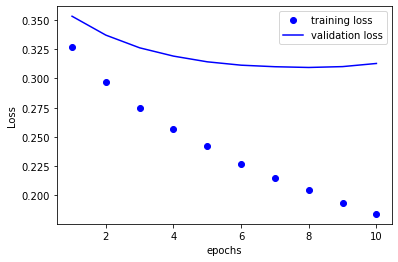

In [ ]:
epochs = range(1, len(acc)+1)

plt.plot(epochs, loss, 'bo', label='training loss')
plt.plot(epochs, val_loss, 'b', label='validation loss')
plt.xlabel("epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

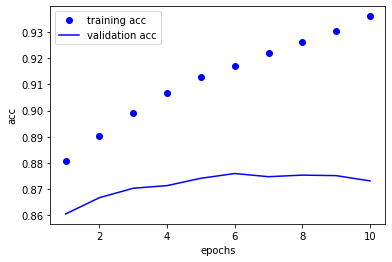

In [ ]:
plt.plot(epochs, acc, 'bo', label='training acc')
plt.plot(epochs, val_acc, 'b', label='validation acc')
plt.xlabel("epochs")
plt.ylabel("acc")
plt.legend()
plt.show()

In [ ]:
_test_dataset = tf.keras.preprocessing.text_dataset_from_directory(
    directory='aclImdb/test',
    batch_size=batch_size
)

Found 25000 files belonging to 2 classes.


In [ ]:
export_model = tf.keras.Sequential([
    vectorize_layer,
    model,
    layers.Activation('sigmoid')
])

export_model.compile(
    loss=losses.BinaryCrossentropy(from_logits=False), optimizer='adam', metrics=['accuracy']
)
 
loss, acc = export_model.evaluate(_test_dataset)
print(loss, acc)

782/782 [==============================] - 8s 10ms/step - loss: 0.3101 - accuracy: 0.8742
0.31014981865882874 0.8741999864578247


In [ ]:
examples = [
    "The movie was great!",
    "The movie was okay.",
    "The movie soooooo okay.",
    "The movie was terrible..."
]

pred_array = export_model.predict(examples)
print(pred_array)

[[0.62818336]
 [0.40862104]
 [0.4219569 ]
 [0.3156675 ]]
